# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                     'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
                                    'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
                                    'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,corr_r_MIN,corr_r_MAX,corr_r_MEAN,...,corr_g_Q25,corr_g_Q50,corr_g_Q75,corr_b_MIN,corr_b_MAX,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.072792,0.897968,0.572567,...,0.497556,0.584320,0.668442,0.077811,0.863652,0.518018,0.113930,0.439382,0.518809,0.597901
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.098347,0.909240,0.587272,...,0.542706,0.631789,0.712794,0.052518,0.862133,0.542428,0.116621,0.460031,0.544188,0.626953
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.187811,0.898380,0.612170,...,0.572617,0.653954,0.723677,0.191379,0.880284,0.571301,0.107878,0.497573,0.576860,0.649310
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.020686,0.903616,0.567109,...,0.518111,0.610417,0.693706,0.050205,0.885130,0.532325,0.122542,0.448346,0.535249,0.619780
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.106549,0.890626,0.588641,...,0.539576,0.626229,0.705864,0.132591,0.885208,0.553496,0.113840,0.473676,0.555569,0.634890


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   corr_r_MIN     103 non-null    float64
 8   corr_r_MAX     103 non-null    float64
 9   corr_r_MEAN    103 non-null    float64
 10  corr_r_STD     103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_Q50     103 non-null    float64
 13  corr_r_Q75     103 non-null    float64
 14  corr_g_MIN     103 non-null    float64
 15  corr_g_MAX     103 non-null    float64
 16  corr_g_MEAN    103 non-null    float64
 17  corr_g_STD     103 non-null    float64
 18  corr_g_Q25

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_11576/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,corr_r_MIN,corr_r_MAX,corr_r_MEAN,...,corr_g_Q25,corr_g_Q50,corr_g_Q75,corr_b_MIN,corr_b_MAX,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.073579,0.797606,0.468584,...,0.478307,0.565781,0.650812,0.075865,0.866345,0.510064,0.116170,0.429410,0.510315,0.591593
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.056017,0.214389,0.174891,...,0.046096,0.044333,0.041063,0.062457,0.038081,0.045793,0.008982,0.048063,0.048657,0.047126
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.062450,0.168530,0.046534,...,0.383336,0.460241,0.540346,-0.118843,0.751174,0.409975,0.092946,0.335992,0.408867,0.476234
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.027204,0.854351,0.502632,...,0.445138,0.538483,0.628094,0.035357,0.847293,0.482231,0.110225,0.401154,0.480816,0.565669
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.063714,0.877336,0.532892,...,0.475896,0.565165,0.651966,0.068192,0.863652,0.509716,0.115968,0.429827,0.511221,0.591945
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.110983,0.898174,0.558484,...,0.502652,0.587269,0.671831,0.112101,0.885169,0.531403,0.122193,0.450780,0.533339,0.617455
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.241284,0.952182,0.625207,...,0.602592,0.670793,0.733166,0.248034,0.954356,0.664292,0.141161,0.602592,0.670793,0.733166


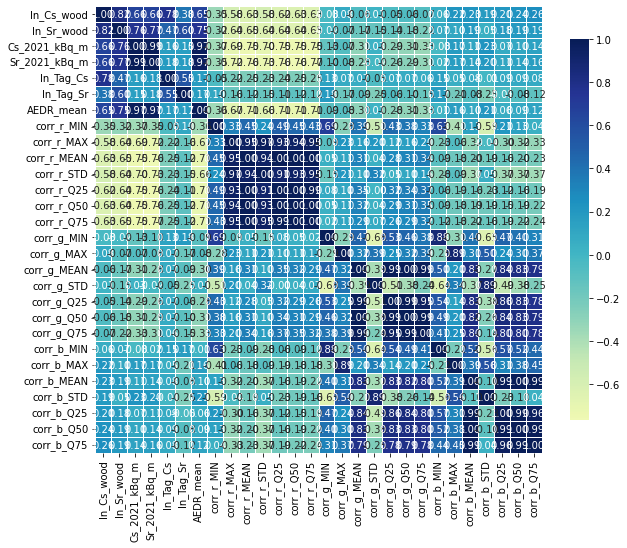

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
                                   'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
                                   'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,corr_r_MIN,corr_r_MAX,corr_r_MEAN,corr_r_STD,corr_r_Q25,corr_r_Q50,corr_r_Q75,corr_g_MIN,corr_g_MAX,corr_g_MEAN,...,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.072792,0.897968,0.572567,0.121822,0.488754,0.576581,0.661558,0.090252,0.895149,0.581069,...,0.518018,0.113930,0.439382,0.518809,0.597901,8.687355,9.451387,8.080390,10.882091,6.987571
1,0.098347,0.909240,0.587272,0.122924,0.501683,0.593796,0.678807,0.122149,0.903737,0.623279,...,0.542428,0.116621,0.460031,0.544188,0.626953,11.385097,8.033393,11.141775,10.766776,7.490701
2,0.187811,0.898380,0.612170,0.114543,0.540056,0.623865,0.695379,0.168957,0.915888,0.642791,...,0.571301,0.107878,0.497573,0.576860,0.649310,7.489995,12.170524,7.183323,11.784231,7.819859
3,0.020686,0.903616,0.567109,0.128444,0.480991,0.573778,0.660995,0.083553,0.912380,0.601673,...,0.532325,0.122542,0.448346,0.535249,0.619780,11.802467,10.262015,11.861375,10.014248,14.017466
4,0.106549,0.890626,0.588641,0.119364,0.505257,0.594378,0.675643,0.087018,0.901316,0.619317,...,0.553496,0.113840,0.473676,0.555569,0.634890,12.021212,8.481843,8.594002,13.573122,10.037330


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.18647449517746284, -0.9599909845023056, 0.31327302412891345]
    Mean: -0.278
    Std: 0.524

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.02924082 1.03544443 1.16670861]
    Mean: 1.077
    Std: 0.063

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9620009709234748, 0.7395106150363298, 0.9581990128980182]
    Mean: 0.887
    Std: 0.104

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.099 (std: 0.380)
Parameters: {'colsample_bytree': 0.38841538135030335, 'gamma': 0.4432301401579651, 'learning_rate': 0.023616583233277977, 'max_depth': 3, 'n_estimators': 187, 'subsample': 0.4663093677423268}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.56700501, 0.19757543, 0.88672137, 0.59589677, 0.28953257,
       0.49415159, 0.42713795, 0.55851102, 0.22853088, 0.15946717]), 'std_fit_time': array([0.21461792, 0.01846283, 0.3787705 , 0.17247124, 0.1591495 ,
       0.09594327, 0.00821517, 0.03154939, 0.03157114, 0.00613055]), 'mean_score_time': array([0.00666065, 0.00740376, 0.00833707, 0.009409  , 0.00955911,
       0.00761991, 0.00707126, 0.00696588, 0.01086969, 0.00717034]), 'std_score_time': array([0.00025899, 0.00098641, 0.00166104, 0.00364228, 0.00494871,
       0.00142952, 0.00084036, 0.00028733, 0.00484398, 0.00011582]), 'param_colsample_bytree': masked_array(data=[0.7290372483888831, 0.7182329944500492,
                   0.12876706099804197, 0.2887858425045895,
                   0.45343321434685613, 0.8137294240565839,
                   0.5451366009326262, 0.38841538135030335,
                   0.4133209590344909, 0.07116942054304139],
             mask=[False, False, False, False, False, False

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.38841538135030335
Gamma: 0.4432301401579651
Learning_rate: 0.023616583233277977
Max_depth: 3
N_estimators: 187
Subsample: 0.4663093677423268


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.31092	validation_1-rmse:1.33567
[1]	validation_0-rmse:1.29859	validation_1-rmse:1.33184
[2]	validation_0-rmse:1.28548	validation_1-rmse:1.32538


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.27256	validation_1-rmse:1.32275
[4]	validation_0-rmse:1.25371	validation_1-rmse:1.30658
[5]	validation_0-rmse:1.23470	validation_1-rmse:1.29860
[6]	validation_0-rmse:1.22042	validation_1-rmse:1.28515
[7]	validation_0-rmse:1.20407	validation_1-rmse:1.27307
[8]	validation_0-rmse:1.18964	validation_1-rmse:1.27283
[9]	validation_0-rmse:1.17994	validation_1-rmse:1.26765
[10]	validation_0-rmse:1.16822	validation_1-rmse:1.26027
[11]	validation_0-rmse:1.15663	validation_1-rmse:1.26410
[12]	validation_0-rmse:1.14599	validation_1-rmse:1.26374
[13]	validation_0-rmse:1.13095	validation_1-rmse:1.25283
[14]	validation_0-rmse:1.11544	validation_1-rmse:1.24346
[15]	validation_0-rmse:1.10571	validation_1-rmse:1.23772
[16]	validation_0-rmse:1.09415	validation_1-rmse:1.23610
[17]	validation_0-rmse:1.08307	validation_1-rmse:1.23171
[18]	validation_0-rmse:1.06896	validation_1-rmse:1.22451
[19]	validation_0-rmse:1.05956	validation_1-rmse:1.22482
[20]	validation_0-rmse:1.04881	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.20693	validation_1-rmse:1.57287
[4]	validation_0-rmse:1.19203	validation_1-rmse:1.55567
[5]	validation_0-rmse:1.17986	validation_1-rmse:1.54383
[6]	validation_0-rmse:1.17081	validation_1-rmse:1.53472
[7]	validation_0-rmse:1.16095	validation_1-rmse:1.52598
[8]	validation_0-rmse:1.14864	validation_1-rmse:1.50848
[9]	validation_0-rmse:1.13970	validation_1-rmse:1.49521
[10]	validation_0-rmse:1.12715	validation_1-rmse:1.47735
[11]	validation_0-rmse:1.11955	validation_1-rmse:1.46080
[12]	validation_0-rmse:1.10995	validation_1-rmse:1.44845
[13]	validation_0-rmse:1.09991	validation_1-rmse:1.44753
[14]	validation_0-rmse:1.09172	validation_1-rmse:1.44154
[15]	validation_0-rmse:1.08278	validation_1-rmse:1.44049
[16]	validation_0-rmse:1.07689	validation_1-rmse:1.43482
[17]	validation_0-rmse:1.06712	validation_1-rmse:1.42592
[18]	validation_0-rmse:1.05727	validation_1-rmse:1.41397
[19]	validation_0-rmse:1.04900	validation_1-rmse:1.40404
[20]	validation_0-rmse:1.03806	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.30329	validation_1-rmse:1.04982
[6]	validation_0-rmse:1.28660	validation_1-rmse:1.03715
[7]	validation_0-rmse:1.27600	validation_1-rmse:1.02912
[8]	validation_0-rmse:1.25944	validation_1-rmse:1.01541
[9]	validation_0-rmse:1.24901	validation_1-rmse:1.01273
[10]	validation_0-rmse:1.23167	validation_1-rmse:1.00243
[11]	validation_0-rmse:1.21988	validation_1-rmse:1.00024
[12]	validation_0-rmse:1.20278	validation_1-rmse:0.99018
[13]	validation_0-rmse:1.18635	validation_1-rmse:0.97839
[14]	validation_0-rmse:1.17331	validation_1-rmse:0.97258
[15]	validation_0-rmse:1.15706	validation_1-rmse:0.96197
[16]	validation_0-rmse:1.14912	validation_1-rmse:0.95358
[17]	validation_0-rmse:1.14554	validation_1-rmse:0.95611
[18]	validation_0-rmse:1.13892	validation_1-rmse:0.94860
[19]	validation_0-rmse:1.12681	validation_1-rmse:0.94570
[20]	validation_0-rmse:1.11747	validation_1-rmse:0.94245
[21]	validation_0-rmse:1.10836	validation_1-rmse:0.93735
[22]	validation_0-rmse:1.09747	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.27302	validation_1-rmse:0.92248
[8]	validation_0-rmse:1.25656	validation_1-rmse:0.91030
[9]	validation_0-rmse:1.23765	validation_1-rmse:0.89814
[10]	validation_0-rmse:1.22385	validation_1-rmse:0.89575
[11]	validation_0-rmse:1.21399	validation_1-rmse:0.88575
[12]	validation_0-rmse:1.19925	validation_1-rmse:0.87051
[13]	validation_0-rmse:1.18931	validation_1-rmse:0.86310
[14]	validation_0-rmse:1.17544	validation_1-rmse:0.85509
[15]	validation_0-rmse:1.16838	validation_1-rmse:0.85307
[16]	validation_0-rmse:1.15746	validation_1-rmse:0.84723
[17]	validation_0-rmse:1.14724	validation_1-rmse:0.83963
[18]	validation_0-rmse:1.13616	validation_1-rmse:0.83411
[19]	validation_0-rmse:1.12106	validation_1-rmse:0.82515
[20]	validation_0-rmse:1.10681	validation_1-rmse:0.81595
[21]	validation_0-rmse:1.09726	validation_1-rmse:0.81596
[22]	validation_0-rmse:1.08757	validation_1-rmse:0.81029
[23]	validation_0-rmse:1.07538	validation_1-rmse:0.80378
[24]	validation_0-rmse:1.06526	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.26542	validation_1-rmse:0.93454
[8]	validation_0-rmse:1.25039	validation_1-rmse:0.93257
[9]	validation_0-rmse:1.23536	validation_1-rmse:0.93100
[10]	validation_0-rmse:1.21872	validation_1-rmse:0.92179
[11]	validation_0-rmse:1.20778	validation_1-rmse:0.91840
[12]	validation_0-rmse:1.19226	validation_1-rmse:0.91280
[13]	validation_0-rmse:1.17986	validation_1-rmse:0.91507
[14]	validation_0-rmse:1.16925	validation_1-rmse:0.91138
[15]	validation_0-rmse:1.15763	validation_1-rmse:0.90355
[16]	validation_0-rmse:1.14169	validation_1-rmse:0.90389
[17]	validation_0-rmse:1.13247	validation_1-rmse:0.89440
[18]	validation_0-rmse:1.11537	validation_1-rmse:0.89004
[19]	validation_0-rmse:1.10193	validation_1-rmse:0.88448
[20]	validation_0-rmse:1.08590	validation_1-rmse:0.88376
[21]	validation_0-rmse:1.07212	validation_1-rmse:0.88258
[22]	validation_0-rmse:1.06195	validation_1-rmse:0.88535
[23]	validation_0-rmse:1.05029	validation_1-rmse:0.88442
[24]	validation_0-rmse:1.03981	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.21247	validation_1-rmse:1.20317
[8]	validation_0-rmse:1.19791	validation_1-rmse:1.18783
[9]	validation_0-rmse:1.18210	validation_1-rmse:1.17761
[10]	validation_0-rmse:1.16792	validation_1-rmse:1.17105
[11]	validation_0-rmse:1.15729	validation_1-rmse:1.15536
[12]	validation_0-rmse:1.14657	validation_1-rmse:1.15278
[13]	validation_0-rmse:1.13724	validation_1-rmse:1.14691
[14]	validation_0-rmse:1.12589	validation_1-rmse:1.13327
[15]	validation_0-rmse:1.11533	validation_1-rmse:1.12686
[16]	validation_0-rmse:1.10401	validation_1-rmse:1.12487
[17]	validation_0-rmse:1.09114	validation_1-rmse:1.11447
[18]	validation_0-rmse:1.08163	validation_1-rmse:1.10927
[19]	validation_0-rmse:1.07022	validation_1-rmse:1.09917
[20]	validation_0-rmse:1.06048	validation_1-rmse:1.09408
[21]	validation_0-rmse:1.04900	validation_1-rmse:1.08436
[22]	validation_0-rmse:1.03773	validation_1-rmse:1.07547
[23]	validation_0-rmse:1.03081	validation_1-rmse:1.06821
[24]	validation_0-rmse:1.01960	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.23361	validation_1-rmse:1.34644
[5]	validation_0-rmse:1.21853	validation_1-rmse:1.34243
[6]	validation_0-rmse:1.20793	validation_1-rmse:1.33205
[7]	validation_0-rmse:1.19884	validation_1-rmse:1.32158
[8]	validation_0-rmse:1.18314	validation_1-rmse:1.31185
[9]	validation_0-rmse:1.16897	validation_1-rmse:1.29774
[10]	validation_0-rmse:1.15266	validation_1-rmse:1.28394
[11]	validation_0-rmse:1.14203	validation_1-rmse:1.27369
[12]	validation_0-rmse:1.13371	validation_1-rmse:1.26896
[13]	validation_0-rmse:1.13047	validation_1-rmse:1.26467
[14]	validation_0-rmse:1.11956	validation_1-rmse:1.26456
[15]	validation_0-rmse:1.10598	validation_1-rmse:1.25809
[16]	validation_0-rmse:1.09479	validation_1-rmse:1.25136
[17]	validation_0-rmse:1.08457	validation_1-rmse:1.24419
[18]	validation_0-rmse:1.07158	validation_1-rmse:1.23530
[19]	validation_0-rmse:1.05756	validation_1-rmse:1.22781
[20]	validation_0-rmse:1.04096	validation_1-rmse:1.21862
[21]	validation_0-rmse:1.02819	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.22791	validation_1-rmse:1.31390
[5]	validation_0-rmse:1.21947	validation_1-rmse:1.30978
[6]	validation_0-rmse:1.20586	validation_1-rmse:1.30015
[7]	validation_0-rmse:1.19242	validation_1-rmse:1.29163
[8]	validation_0-rmse:1.18322	validation_1-rmse:1.28505
[9]	validation_0-rmse:1.17023	validation_1-rmse:1.28496
[10]	validation_0-rmse:1.16004	validation_1-rmse:1.27411
[11]	validation_0-rmse:1.15341	validation_1-rmse:1.27220
[12]	validation_0-rmse:1.14746	validation_1-rmse:1.27070
[13]	validation_0-rmse:1.13510	validation_1-rmse:1.26971
[14]	validation_0-rmse:1.12776	validation_1-rmse:1.26469
[15]	validation_0-rmse:1.11803	validation_1-rmse:1.25987
[16]	validation_0-rmse:1.10711	validation_1-rmse:1.25149
[17]	validation_0-rmse:1.09415	validation_1-rmse:1.24223
[18]	validation_0-rmse:1.08111	validation_1-rmse:1.23501
[19]	validation_0-rmse:1.06995	validation_1-rmse:1.22032
[20]	validation_0-rmse:1.05776	validation_1-rmse:1.21001
[21]	validation_0-rmse:1.05294	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.26321	validation_1-rmse:1.26273
[5]	validation_0-rmse:1.25423	validation_1-rmse:1.25492
[6]	validation_0-rmse:1.23559	validation_1-rmse:1.24467
[7]	validation_0-rmse:1.22717	validation_1-rmse:1.24301
[8]	validation_0-rmse:1.21096	validation_1-rmse:1.22226
[9]	validation_0-rmse:1.20310	validation_1-rmse:1.21941
[10]	validation_0-rmse:1.19065	validation_1-rmse:1.21163
[11]	validation_0-rmse:1.18357	validation_1-rmse:1.21134
[12]	validation_0-rmse:1.16993	validation_1-rmse:1.20910
[13]	validation_0-rmse:1.15886	validation_1-rmse:1.20287
[14]	validation_0-rmse:1.14931	validation_1-rmse:1.19196
[15]	validation_0-rmse:1.13737	validation_1-rmse:1.17781
[16]	validation_0-rmse:1.12563	validation_1-rmse:1.16742
[17]	validation_0-rmse:1.11750	validation_1-rmse:1.15785
[18]	validation_0-rmse:1.10854	validation_1-rmse:1.15210
[19]	validation_0-rmse:1.09339	validation_1-rmse:1.14289
[20]	validation_0-rmse:1.08297	validation_1-rmse:1.13564
[21]	validation_0-rmse:1.07516	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.23812	validation_1-rmse:1.43672
[4]	validation_0-rmse:1.22035	validation_1-rmse:1.42430
[5]	validation_0-rmse:1.21098	validation_1-rmse:1.41864
[6]	validation_0-rmse:1.19706	validation_1-rmse:1.40140
[7]	validation_0-rmse:1.18297	validation_1-rmse:1.38425
[8]	validation_0-rmse:1.17031	validation_1-rmse:1.37531
[9]	validation_0-rmse:1.15815	validation_1-rmse:1.36318
[10]	validation_0-rmse:1.14672	validation_1-rmse:1.35328
[11]	validation_0-rmse:1.13374	validation_1-rmse:1.34151
[12]	validation_0-rmse:1.12571	validation_1-rmse:1.33520
[13]	validation_0-rmse:1.11744	validation_1-rmse:1.32511
[14]	validation_0-rmse:1.10705	validation_1-rmse:1.31970
[15]	validation_0-rmse:1.09850	validation_1-rmse:1.31759
[16]	validation_0-rmse:1.08451	validation_1-rmse:1.30821
[17]	validation_0-rmse:1.07104	validation_1-rmse:1.29740
[18]	validation_0-rmse:1.05817	validation_1-rmse:1.28415
[19]	validation_0-rmse:1.04783	validation_1-rmse:1.27539
[20]	validation_0-rmse:1.03347	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.20641	validation_1-rmse:1.41865
[5]	validation_0-rmse:1.19819	validation_1-rmse:1.41427
[6]	validation_0-rmse:1.18511	validation_1-rmse:1.40936
[7]	validation_0-rmse:1.17289	validation_1-rmse:1.40217
[8]	validation_0-rmse:1.16414	validation_1-rmse:1.39621
[9]	validation_0-rmse:1.15080	validation_1-rmse:1.38743
[10]	validation_0-rmse:1.13732	validation_1-rmse:1.37132
[11]	validation_0-rmse:1.12520	validation_1-rmse:1.36201
[12]	validation_0-rmse:1.11246	validation_1-rmse:1.34857
[13]	validation_0-rmse:1.09797	validation_1-rmse:1.33773
[14]	validation_0-rmse:1.08960	validation_1-rmse:1.32214
[15]	validation_0-rmse:1.07713	validation_1-rmse:1.31154
[16]	validation_0-rmse:1.07030	validation_1-rmse:1.30914
[17]	validation_0-rmse:1.06275	validation_1-rmse:1.30705
[18]	validation_0-rmse:1.05243	validation_1-rmse:1.30339
[19]	validation_0-rmse:1.04573	validation_1-rmse:1.30198
[20]	validation_0-rmse:1.03549	validation_1-rmse:1.29468
[21]	validation_0-rmse:1.02690	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.18571	validation_1-rmse:1.62293
[4]	validation_0-rmse:1.17161	validation_1-rmse:1.61792
[5]	validation_0-rmse:1.16334	validation_1-rmse:1.61769
[6]	validation_0-rmse:1.14979	validation_1-rmse:1.60443
[7]	validation_0-rmse:1.13606	validation_1-rmse:1.58903
[8]	validation_0-rmse:1.12660	validation_1-rmse:1.58234
[9]	validation_0-rmse:1.11174	validation_1-rmse:1.56993
[10]	validation_0-rmse:1.10481	validation_1-rmse:1.55682
[11]	validation_0-rmse:1.09537	validation_1-rmse:1.54548
[12]	validation_0-rmse:1.08658	validation_1-rmse:1.54205
[13]	validation_0-rmse:1.07576	validation_1-rmse:1.54044
[14]	validation_0-rmse:1.06595	validation_1-rmse:1.52870
[15]	validation_0-rmse:1.06069	validation_1-rmse:1.52267
[16]	validation_0-rmse:1.05197	validation_1-rmse:1.51463
[17]	validation_0-rmse:1.04172	validation_1-rmse:1.50306
[18]	validation_0-rmse:1.03186	validation_1-rmse:1.49248
[19]	validation_0-rmse:1.02186	validation_1-rmse:1.48292
[20]	validation_0-rmse:1.01677	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.32171	validation_1-rmse:0.97587
[5]	validation_0-rmse:1.30322	validation_1-rmse:0.97371
[6]	validation_0-rmse:1.28801	validation_1-rmse:0.96217
[7]	validation_0-rmse:1.27642	validation_1-rmse:0.95681
[8]	validation_0-rmse:1.26329	validation_1-rmse:0.95531
[9]	validation_0-rmse:1.25071	validation_1-rmse:0.95445
[10]	validation_0-rmse:1.23640	validation_1-rmse:0.94654
[11]	validation_0-rmse:1.21818	validation_1-rmse:0.94447
[12]	validation_0-rmse:1.20326	validation_1-rmse:0.94231
[13]	validation_0-rmse:1.18728	validation_1-rmse:0.93877
[14]	validation_0-rmse:1.17413	validation_1-rmse:0.92965
[15]	validation_0-rmse:1.16371	validation_1-rmse:0.92632
[16]	validation_0-rmse:1.14805	validation_1-rmse:0.92625
[17]	validation_0-rmse:1.13155	validation_1-rmse:0.92324
[18]	validation_0-rmse:1.11912	validation_1-rmse:0.91667
[19]	validation_0-rmse:1.10816	validation_1-rmse:0.91333
[20]	validation_0-rmse:1.09787	validation_1-rmse:0.91174
[21]	validation_0-rmse:1.09308	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.26218	validation_1-rmse:1.16324
[6]	validation_0-rmse:1.24078	validation_1-rmse:1.15302
[7]	validation_0-rmse:1.22318	validation_1-rmse:1.14364
[8]	validation_0-rmse:1.20476	validation_1-rmse:1.12925
[9]	validation_0-rmse:1.18989	validation_1-rmse:1.12065
[10]	validation_0-rmse:1.17487	validation_1-rmse:1.10694
[11]	validation_0-rmse:1.15918	validation_1-rmse:1.09347
[12]	validation_0-rmse:1.14642	validation_1-rmse:1.08250
[13]	validation_0-rmse:1.13020	validation_1-rmse:1.07152
[14]	validation_0-rmse:1.11593	validation_1-rmse:1.06649
[15]	validation_0-rmse:1.10060	validation_1-rmse:1.06280
[16]	validation_0-rmse:1.08842	validation_1-rmse:1.05972
[17]	validation_0-rmse:1.07540	validation_1-rmse:1.05485
[18]	validation_0-rmse:1.06383	validation_1-rmse:1.05397
[19]	validation_0-rmse:1.05191	validation_1-rmse:1.04916
[20]	validation_0-rmse:1.03910	validation_1-rmse:1.04263
[21]	validation_0-rmse:1.03267	validation_1-rmse:1.04170
[22]	validation_0-rmse:1.02388	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.20853	validation_1-rmse:1.45919
[5]	validation_0-rmse:1.19458	validation_1-rmse:1.45112
[6]	validation_0-rmse:1.17729	validation_1-rmse:1.43783
[7]	validation_0-rmse:1.16567	validation_1-rmse:1.43073
[8]	validation_0-rmse:1.15480	validation_1-rmse:1.43110
[9]	validation_0-rmse:1.14371	validation_1-rmse:1.42176
[10]	validation_0-rmse:1.13110	validation_1-rmse:1.40788
[11]	validation_0-rmse:1.12387	validation_1-rmse:1.40699
[12]	validation_0-rmse:1.11169	validation_1-rmse:1.38862
[13]	validation_0-rmse:1.10428	validation_1-rmse:1.38610
[14]	validation_0-rmse:1.09443	validation_1-rmse:1.37701
[15]	validation_0-rmse:1.08588	validation_1-rmse:1.37103
[16]	validation_0-rmse:1.07321	validation_1-rmse:1.35180
[17]	validation_0-rmse:1.06539	validation_1-rmse:1.34827
[18]	validation_0-rmse:1.05635	validation_1-rmse:1.34307
[19]	validation_0-rmse:1.05120	validation_1-rmse:1.34016
[20]	validation_0-rmse:1.03842	validation_1-rmse:1.33317
[21]	validation_0-rmse:1.02766	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.25893	validation_1-rmse:1.38674
[3]	validation_0-rmse:1.24858	validation_1-rmse:1.37592
[4]	validation_0-rmse:1.23081	validation_1-rmse:1.36365
[5]	validation_0-rmse:1.22062	validation_1-rmse:1.36079
[6]	validation_0-rmse:1.20653	validation_1-rmse:1.34455
[7]	validation_0-rmse:1.19127	validation_1-rmse:1.33051
[8]	validation_0-rmse:1.17306	validation_1-rmse:1.32476
[9]	validation_0-rmse:1.16584	validation_1-rmse:1.32659
[10]	validation_0-rmse:1.15445	validation_1-rmse:1.32001
[11]	validation_0-rmse:1.14514	validation_1-rmse:1.30896
[12]	validation_0-rmse:1.13411	validation_1-rmse:1.29779
[13]	validation_0-rmse:1.11852	validation_1-rmse:1.28899
[14]	validation_0-rmse:1.10939	validation_1-rmse:1.28877
[15]	validation_0-rmse:1.09855	validation_1-rmse:1.28287
[16]	validation_0-rmse:1.08803	validation_1-rmse:1.28457
[17]	validation_0-rmse:1.07607	validation_1-rmse:1.27346
[18]	validation_0-rmse:1.06298	validation_1-rmse:1.26969
[19]	validation_0-rmse:1.05221	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.25198	validation_1-rmse:1.17105
[6]	validation_0-rmse:1.23802	validation_1-rmse:1.16544
[7]	validation_0-rmse:1.22202	validation_1-rmse:1.16499
[8]	validation_0-rmse:1.20609	validation_1-rmse:1.16153
[9]	validation_0-rmse:1.19075	validation_1-rmse:1.15900
[10]	validation_0-rmse:1.17632	validation_1-rmse:1.15803
[11]	validation_0-rmse:1.15447	validation_1-rmse:1.15268
[12]	validation_0-rmse:1.13790	validation_1-rmse:1.14601
[13]	validation_0-rmse:1.12740	validation_1-rmse:1.14334
[14]	validation_0-rmse:1.11194	validation_1-rmse:1.13584
[15]	validation_0-rmse:1.09895	validation_1-rmse:1.13377
[16]	validation_0-rmse:1.08658	validation_1-rmse:1.13317
[17]	validation_0-rmse:1.07159	validation_1-rmse:1.13836
[18]	validation_0-rmse:1.06033	validation_1-rmse:1.13960
[19]	validation_0-rmse:1.04511	validation_1-rmse:1.14070
[20]	validation_0-rmse:1.03179	validation_1-rmse:1.13873
[21]	validation_0-rmse:1.02647	validation_1-rmse:1.13702
[22]	validation_0-rmse:1.02006	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.20856	validation_1-rmse:1.27916
[7]	validation_0-rmse:1.19801	validation_1-rmse:1.27197
[8]	validation_0-rmse:1.18334	validation_1-rmse:1.26333
[9]	validation_0-rmse:1.16795	validation_1-rmse:1.24966
[10]	validation_0-rmse:1.15377	validation_1-rmse:1.24259
[11]	validation_0-rmse:1.14103	validation_1-rmse:1.23129
[12]	validation_0-rmse:1.12451	validation_1-rmse:1.22500
[13]	validation_0-rmse:1.11336	validation_1-rmse:1.22073
[14]	validation_0-rmse:1.09835	validation_1-rmse:1.20868
[15]	validation_0-rmse:1.08425	validation_1-rmse:1.20364
[16]	validation_0-rmse:1.07209	validation_1-rmse:1.19924
[17]	validation_0-rmse:1.05752	validation_1-rmse:1.19223
[18]	validation_0-rmse:1.04954	validation_1-rmse:1.19186
[19]	validation_0-rmse:1.03593	validation_1-rmse:1.18274
[20]	validation_0-rmse:1.02349	validation_1-rmse:1.17356
[21]	validation_0-rmse:1.01385	validation_1-rmse:1.16942
[22]	validation_0-rmse:1.00417	validation_1-rmse:1.16531
[23]	validation_0-rmse:0.99389	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.13554	validation_1-rmse:1.75303
[4]	validation_0-rmse:1.12324	validation_1-rmse:1.73887
[5]	validation_0-rmse:1.11391	validation_1-rmse:1.72826
[6]	validation_0-rmse:1.10023	validation_1-rmse:1.71236
[7]	validation_0-rmse:1.09287	validation_1-rmse:1.70919
[8]	validation_0-rmse:1.08382	validation_1-rmse:1.69462
[9]	validation_0-rmse:1.07251	validation_1-rmse:1.68026
[10]	validation_0-rmse:1.06459	validation_1-rmse:1.67029
[11]	validation_0-rmse:1.05475	validation_1-rmse:1.66457
[12]	validation_0-rmse:1.04694	validation_1-rmse:1.65451
[13]	validation_0-rmse:1.03476	validation_1-rmse:1.63784
[14]	validation_0-rmse:1.02651	validation_1-rmse:1.63207
[15]	validation_0-rmse:1.02403	validation_1-rmse:1.63294
[16]	validation_0-rmse:1.02024	validation_1-rmse:1.63459
[17]	validation_0-rmse:1.00814	validation_1-rmse:1.61605
[18]	validation_0-rmse:1.00215	validation_1-rmse:1.60982
[19]	validation_0-rmse:0.99410	validation_1-rmse:1.60201
[20]	validation_0-rmse:0.98304	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.17677	validation_1-rmse:1.60978
[4]	validation_0-rmse:1.16500	validation_1-rmse:1.59796
[5]	validation_0-rmse:1.15356	validation_1-rmse:1.59215
[6]	validation_0-rmse:1.13949	validation_1-rmse:1.57616
[7]	validation_0-rmse:1.12802	validation_1-rmse:1.55315
[8]	validation_0-rmse:1.11663	validation_1-rmse:1.53952
[9]	validation_0-rmse:1.10371	validation_1-rmse:1.52457
[10]	validation_0-rmse:1.09847	validation_1-rmse:1.52375
[11]	validation_0-rmse:1.09042	validation_1-rmse:1.51844
[12]	validation_0-rmse:1.08468	validation_1-rmse:1.51190
[13]	validation_0-rmse:1.07284	validation_1-rmse:1.49733
[14]	validation_0-rmse:1.06382	validation_1-rmse:1.49135
[15]	validation_0-rmse:1.05586	validation_1-rmse:1.49228
[16]	validation_0-rmse:1.05071	validation_1-rmse:1.48719
[17]	validation_0-rmse:1.03566	validation_1-rmse:1.46982
[18]	validation_0-rmse:1.02452	validation_1-rmse:1.45788
[19]	validation_0-rmse:1.01456	validation_1-rmse:1.45661
[20]	validation_0-rmse:1.00759	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.31622	validation_1-rmse:1.14482
[3]	validation_0-rmse:1.30222	validation_1-rmse:1.13758
[4]	validation_0-rmse:1.29084	validation_1-rmse:1.12706
[5]	validation_0-rmse:1.27705	validation_1-rmse:1.11823
[6]	validation_0-rmse:1.26342	validation_1-rmse:1.11264
[7]	validation_0-rmse:1.25134	validation_1-rmse:1.10355
[8]	validation_0-rmse:1.23382	validation_1-rmse:1.09608
[9]	validation_0-rmse:1.22502	validation_1-rmse:1.08572
[10]	validation_0-rmse:1.20876	validation_1-rmse:1.07863
[11]	validation_0-rmse:1.20288	validation_1-rmse:1.07235
[12]	validation_0-rmse:1.18810	validation_1-rmse:1.06502
[13]	validation_0-rmse:1.17589	validation_1-rmse:1.06010
[14]	validation_0-rmse:1.17138	validation_1-rmse:1.05772
[15]	validation_0-rmse:1.16432	validation_1-rmse:1.05831
[16]	validation_0-rmse:1.15109	validation_1-rmse:1.05058
[17]	validation_0-rmse:1.14010	validation_1-rmse:1.04331
[18]	validation_0-rmse:1.13276	validation_1-rmse:1.03497
[19]	validation_0-rmse:1.12376	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.21254	validation_1-rmse:1.59752
[3]	validation_0-rmse:1.20152	validation_1-rmse:1.59110
[4]	validation_0-rmse:1.18624	validation_1-rmse:1.58007
[5]	validation_0-rmse:1.17286	validation_1-rmse:1.56989
[6]	validation_0-rmse:1.15902	validation_1-rmse:1.56176
[7]	validation_0-rmse:1.14807	validation_1-rmse:1.56157
[8]	validation_0-rmse:1.13605	validation_1-rmse:1.55132
[9]	validation_0-rmse:1.12175	validation_1-rmse:1.53703
[10]	validation_0-rmse:1.11787	validation_1-rmse:1.53844
[11]	validation_0-rmse:1.10912	validation_1-rmse:1.53573
[12]	validation_0-rmse:1.09659	validation_1-rmse:1.52428
[13]	validation_0-rmse:1.08616	validation_1-rmse:1.50745
[14]	validation_0-rmse:1.07652	validation_1-rmse:1.49907
[15]	validation_0-rmse:1.06769	validation_1-rmse:1.48305
[16]	validation_0-rmse:1.05785	validation_1-rmse:1.47706
[17]	validation_0-rmse:1.04764	validation_1-rmse:1.46993
[18]	validation_0-rmse:1.03952	validation_1-rmse:1.47207
[19]	validation_0-rmse:1.02624	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.36909	validation_1-rmse:0.90616
[3]	validation_0-rmse:1.35779	validation_1-rmse:0.90127
[4]	validation_0-rmse:1.33866	validation_1-rmse:0.89689
[5]	validation_0-rmse:1.32031	validation_1-rmse:0.89374
[6]	validation_0-rmse:1.30357	validation_1-rmse:0.89039
[7]	validation_0-rmse:1.28582	validation_1-rmse:0.88135
[8]	validation_0-rmse:1.26682	validation_1-rmse:0.87714
[9]	validation_0-rmse:1.24824	validation_1-rmse:0.87139
[10]	validation_0-rmse:1.23380	validation_1-rmse:0.86865
[11]	validation_0-rmse:1.21906	validation_1-rmse:0.87567
[12]	validation_0-rmse:1.20560	validation_1-rmse:0.86587
[13]	validation_0-rmse:1.19014	validation_1-rmse:0.86554
[14]	validation_0-rmse:1.17507	validation_1-rmse:0.86595
[15]	validation_0-rmse:1.16665	validation_1-rmse:0.86788
[16]	validation_0-rmse:1.15023	validation_1-rmse:0.86873
[17]	validation_0-rmse:1.13697	validation_1-rmse:0.86706
[18]	validation_0-rmse:1.12250	validation_1-rmse:0.86245
[19]	validation_0-rmse:1.11284	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.20989	validation_1-rmse:1.62607
[2]	validation_0-rmse:1.19344	validation_1-rmse:1.62015
[3]	validation_0-rmse:1.18068	validation_1-rmse:1.60838
[4]	validation_0-rmse:1.16695	validation_1-rmse:1.60555
[5]	validation_0-rmse:1.15571	validation_1-rmse:1.60002
[6]	validation_0-rmse:1.14714	validation_1-rmse:1.59409
[7]	validation_0-rmse:1.13622	validation_1-rmse:1.59242
[8]	validation_0-rmse:1.12549	validation_1-rmse:1.57646
[9]	validation_0-rmse:1.11278	validation_1-rmse:1.57722
[10]	validation_0-rmse:1.10440	validation_1-rmse:1.57058
[11]	validation_0-rmse:1.09697	validation_1-rmse:1.57118
[12]	validation_0-rmse:1.08388	validation_1-rmse:1.56099
[13]	validation_0-rmse:1.07274	validation_1-rmse:1.55119
[14]	validation_0-rmse:1.06356	validation_1-rmse:1.55048
[15]	validation_0-rmse:1.05639	validation_1-rmse:1.55178
[16]	validation_0-rmse:1.04635	validation_1-rmse:1.54894
[17]	validation_0-rmse:1.03802	validation_1-rmse:1.54312
[18]	validation_0-rmse:1.02865	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.25801	validation_1-rmse:1.42600
[3]	validation_0-rmse:1.24146	validation_1-rmse:1.41462
[4]	validation_0-rmse:1.22556	validation_1-rmse:1.39321
[5]	validation_0-rmse:1.21235	validation_1-rmse:1.38112
[6]	validation_0-rmse:1.20027	validation_1-rmse:1.37147
[7]	validation_0-rmse:1.18726	validation_1-rmse:1.35353
[8]	validation_0-rmse:1.17201	validation_1-rmse:1.34236
[9]	validation_0-rmse:1.15955	validation_1-rmse:1.33507
[10]	validation_0-rmse:1.15471	validation_1-rmse:1.32871
[11]	validation_0-rmse:1.14727	validation_1-rmse:1.32692
[12]	validation_0-rmse:1.13881	validation_1-rmse:1.32152
[13]	validation_0-rmse:1.12530	validation_1-rmse:1.30966
[14]	validation_0-rmse:1.11311	validation_1-rmse:1.30181
[15]	validation_0-rmse:1.10308	validation_1-rmse:1.29124
[16]	validation_0-rmse:1.08850	validation_1-rmse:1.27282
[17]	validation_0-rmse:1.07887	validation_1-rmse:1.26312
[18]	validation_0-rmse:1.06590	validation_1-rmse:1.24860
[19]	validation_0-rmse:1.05673	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.26617	validation_1-rmse:0.98981
[8]	validation_0-rmse:1.24864	validation_1-rmse:0.97796
[9]	validation_0-rmse:1.23285	validation_1-rmse:0.96940
[10]	validation_0-rmse:1.21660	validation_1-rmse:0.96587
[11]	validation_0-rmse:1.20101	validation_1-rmse:0.96671
[12]	validation_0-rmse:1.18717	validation_1-rmse:0.95875
[13]	validation_0-rmse:1.17414	validation_1-rmse:0.95678
[14]	validation_0-rmse:1.16377	validation_1-rmse:0.95376
[15]	validation_0-rmse:1.15084	validation_1-rmse:0.95010
[16]	validation_0-rmse:1.13693	validation_1-rmse:0.94671
[17]	validation_0-rmse:1.12381	validation_1-rmse:0.94477
[18]	validation_0-rmse:1.11665	validation_1-rmse:0.94199
[19]	validation_0-rmse:1.10503	validation_1-rmse:0.93937
[20]	validation_0-rmse:1.09174	validation_1-rmse:0.93953
[21]	validation_0-rmse:1.08078	validation_1-rmse:0.93700
[22]	validation_0-rmse:1.07022	validation_1-rmse:0.93333
[23]	validation_0-rmse:1.06138	validation_1-rmse:0.93331
[24]	validation_0-rmse:1.05137	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.21276	validation_1-rmse:1.37071
[7]	validation_0-rmse:1.19689	validation_1-rmse:1.35840
[8]	validation_0-rmse:1.18395	validation_1-rmse:1.34898
[9]	validation_0-rmse:1.16912	validation_1-rmse:1.33411
[10]	validation_0-rmse:1.15460	validation_1-rmse:1.32534
[11]	validation_0-rmse:1.14228	validation_1-rmse:1.32558
[12]	validation_0-rmse:1.13168	validation_1-rmse:1.32103
[13]	validation_0-rmse:1.11782	validation_1-rmse:1.31071
[14]	validation_0-rmse:1.10783	validation_1-rmse:1.30865
[15]	validation_0-rmse:1.09895	validation_1-rmse:1.30355
[16]	validation_0-rmse:1.08977	validation_1-rmse:1.30252
[17]	validation_0-rmse:1.07858	validation_1-rmse:1.29863
[18]	validation_0-rmse:1.06646	validation_1-rmse:1.28659
[19]	validation_0-rmse:1.05966	validation_1-rmse:1.28701
[20]	validation_0-rmse:1.05004	validation_1-rmse:1.28276
[21]	validation_0-rmse:1.04137	validation_1-rmse:1.27581
[22]	validation_0-rmse:1.03013	validation_1-rmse:1.27006
[23]	validation_0-rmse:1.02089	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.26110	validation_1-rmse:1.02143
[8]	validation_0-rmse:1.24565	validation_1-rmse:1.01507
[9]	validation_0-rmse:1.23265	validation_1-rmse:1.00871
[10]	validation_0-rmse:1.21498	validation_1-rmse:1.00293
[11]	validation_0-rmse:1.20471	validation_1-rmse:1.00039
[12]	validation_0-rmse:1.19129	validation_1-rmse:0.98929
[13]	validation_0-rmse:1.17528	validation_1-rmse:0.98085
[14]	validation_0-rmse:1.16213	validation_1-rmse:0.97357
[15]	validation_0-rmse:1.14750	validation_1-rmse:0.97215
[16]	validation_0-rmse:1.13445	validation_1-rmse:0.97805
[17]	validation_0-rmse:1.11586	validation_1-rmse:0.98165
[18]	validation_0-rmse:1.10635	validation_1-rmse:0.98318
[19]	validation_0-rmse:1.09132	validation_1-rmse:0.97810
[20]	validation_0-rmse:1.07460	validation_1-rmse:0.97696
[21]	validation_0-rmse:1.06212	validation_1-rmse:0.97302
[22]	validation_0-rmse:1.05146	validation_1-rmse:0.97542
[23]	validation_0-rmse:1.03867	validation_1-rmse:0.97704
[24]	validation_0-rmse:1.02751	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.21764	validation_1-rmse:1.40511
[6]	validation_0-rmse:1.20883	validation_1-rmse:1.40471
[7]	validation_0-rmse:1.20111	validation_1-rmse:1.39692
[8]	validation_0-rmse:1.18834	validation_1-rmse:1.39111
[9]	validation_0-rmse:1.17433	validation_1-rmse:1.38792
[10]	validation_0-rmse:1.16661	validation_1-rmse:1.38017
[11]	validation_0-rmse:1.15530	validation_1-rmse:1.36523
[12]	validation_0-rmse:1.14839	validation_1-rmse:1.35579
[13]	validation_0-rmse:1.13833	validation_1-rmse:1.34746
[14]	validation_0-rmse:1.12966	validation_1-rmse:1.33703
[15]	validation_0-rmse:1.12138	validation_1-rmse:1.33039
[16]	validation_0-rmse:1.10750	validation_1-rmse:1.32052
[17]	validation_0-rmse:1.10146	validation_1-rmse:1.31438
[18]	validation_0-rmse:1.09066	validation_1-rmse:1.30874
[19]	validation_0-rmse:1.07912	validation_1-rmse:1.29730
[20]	validation_0-rmse:1.07167	validation_1-rmse:1.28866
[21]	validation_0-rmse:1.06657	validation_1-rmse:1.28765
[22]	validation_0-rmse:1.05702	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.24781	validation_1-rmse:1.09545
[8]	validation_0-rmse:1.23433	validation_1-rmse:1.08611
[9]	validation_0-rmse:1.22141	validation_1-rmse:1.07995
[10]	validation_0-rmse:1.21129	validation_1-rmse:1.07479
[11]	validation_0-rmse:1.20105	validation_1-rmse:1.06806
[12]	validation_0-rmse:1.19110	validation_1-rmse:1.06495
[13]	validation_0-rmse:1.18026	validation_1-rmse:1.05473
[14]	validation_0-rmse:1.16425	validation_1-rmse:1.04187
[15]	validation_0-rmse:1.15610	validation_1-rmse:1.03511
[16]	validation_0-rmse:1.14743	validation_1-rmse:1.03306
[17]	validation_0-rmse:1.13127	validation_1-rmse:1.02162
[18]	validation_0-rmse:1.11916	validation_1-rmse:1.01887
[19]	validation_0-rmse:1.10605	validation_1-rmse:1.00924
[20]	validation_0-rmse:1.09319	validation_1-rmse:1.00170
[21]	validation_0-rmse:1.07809	validation_1-rmse:1.00152
[22]	validation_0-rmse:1.07203	validation_1-rmse:1.00174
[23]	validation_0-rmse:1.06200	validation_1-rmse:1.00396
[24]	validation_0-rmse:1.05618	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 113.767, median: 113.5,
 pred. interval (P(0.025)-P(0.975)): 25.25-183.55, 
 conf. interval (p-value=0.95): 91.076-141.091 
***
Aggregate bias statistic: 
 mean: 2.143, median: 2.336,
 pred. interval (P(0.025)-P(0.975)): -6.066-8.685, 
 conf. interval (p-value=0.95): 1.07-3.746 
***
Aggregate RMSE statistic: 
 mean: 1.0, median: 0.999, pred. interval (P(0.025)-P(0.975)): 0.773-1.234, 
 conf. interval (p-value=0.95): 0.943-1.056 
***
Aggregate MSE statistic: 
 mean: 1.018, median: 0.999, pred. interval (P(0.025)-P(0.975)): 0.599-1.525, 
 conf. interval (p-value=0.95): 0.893-1.119 
***
Aggregate R^2 statistic: 
 mean: 0.155, median: 0.182, pred. interval (P(0.025)-P(0.975)): -0.151-0.402, 
 conf. interval (p-value=0.95): 0.106-0.231 
***
Aggregate bias(%) statistic: 
 mean: 7.434, median: 2.336, pred. interval (P(0.025)-P(0.975)): -58.646-191.506, 
 conf. interval (p-value=0.95): -11.25--3.523 
***
Aggregate RMSE(%) statistic: 
 m

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.31627
[1]	validation_0-rmse:1.30234
[2]	validation_0-rmse:1.29328


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.27554
[4]	validation_0-rmse:1.26057
[5]	validation_0-rmse:1.24804
[6]	validation_0-rmse:1.23077
[7]	validation_0-rmse:1.21966
[8]	validation_0-rmse:1.21002
[9]	validation_0-rmse:1.19528
[10]	validation_0-rmse:1.19003
[11]	validation_0-rmse:1.17717
[12]	validation_0-rmse:1.16230
[13]	validation_0-rmse:1.14956
[14]	validation_0-rmse:1.13400
[15]	validation_0-rmse:1.12405
[16]	validation_0-rmse:1.11469
[17]	validation_0-rmse:1.10487
[18]	validation_0-rmse:1.09796
[19]	validation_0-rmse:1.08591
[20]	validation_0-rmse:1.07606
[21]	validation_0-rmse:1.06259
[22]	validation_0-rmse:1.05190
[23]	validation_0-rmse:1.04048
[24]	validation_0-rmse:1.03169
[25]	validation_0-rmse:1.02633
[26]	validation_0-rmse:1.01463
[27]	validation_0-rmse:1.00626
[28]	validation_0-rmse:0.99733
[29]	validation_0-rmse:0.98608
[30]	validation_0-rmse:0.98097
[31]	validation_0-rmse:0.97902
[32]	validation_0-rmse:0.96732
[33]	validation_0-rmse:0.96314
[34]	validation_0-rmse:0.95021
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 186


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

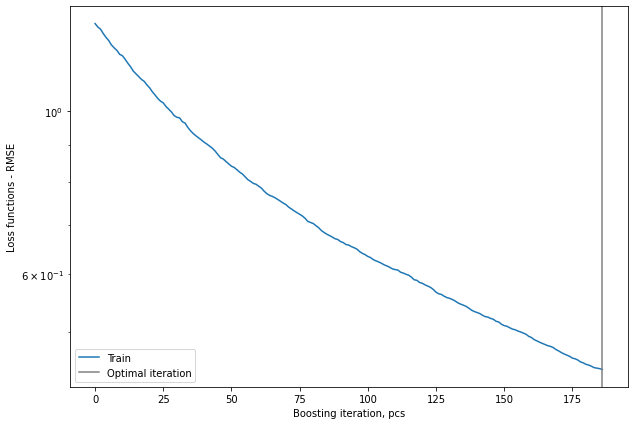

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -3.97
RMSE: 0.4
Relative RMSE(%):  -1.765
MSE: 0.2
R square: 83.6%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.080
a1: 0.646
R^2: 0.917
Uncertainty
a0: -0.080+/-0.022
a1: 0.646+/-0.019


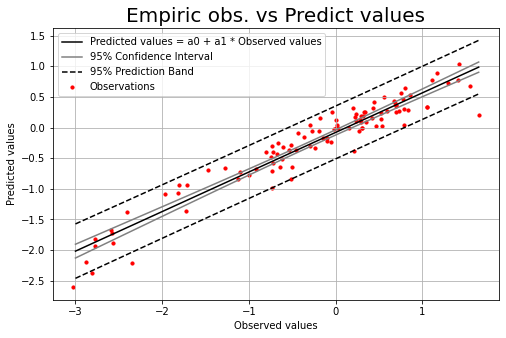

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

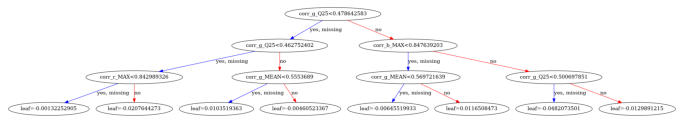

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

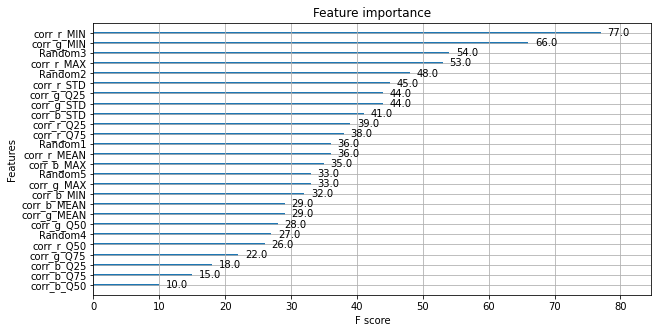

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

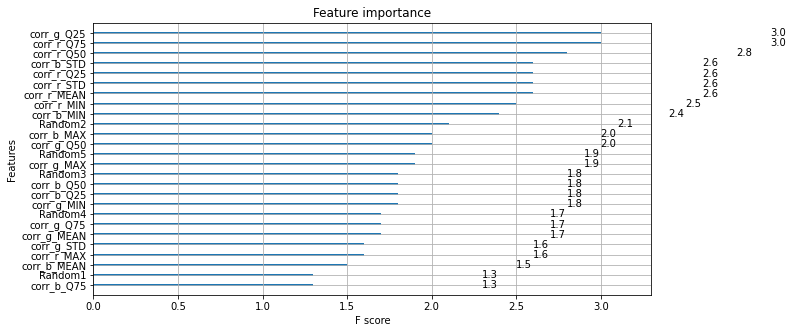

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

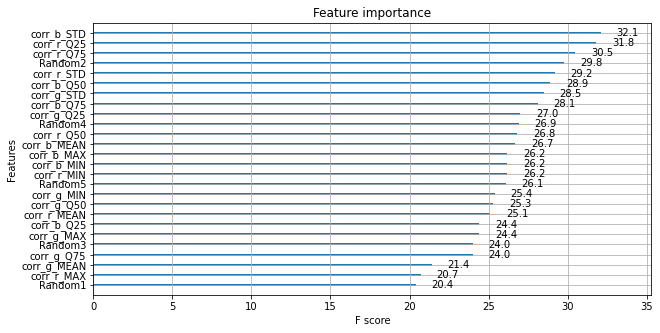

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


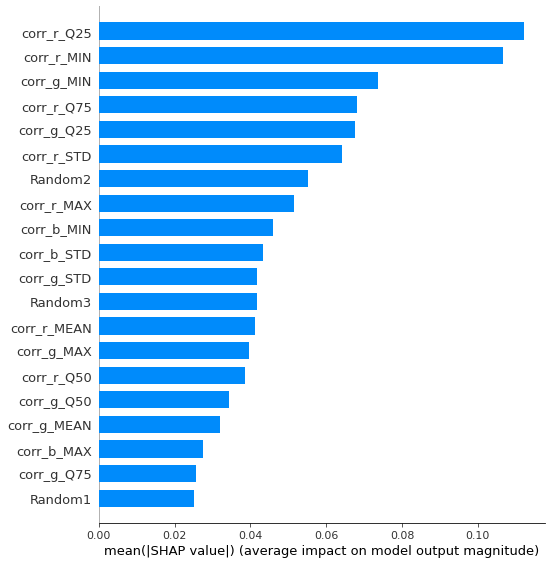

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

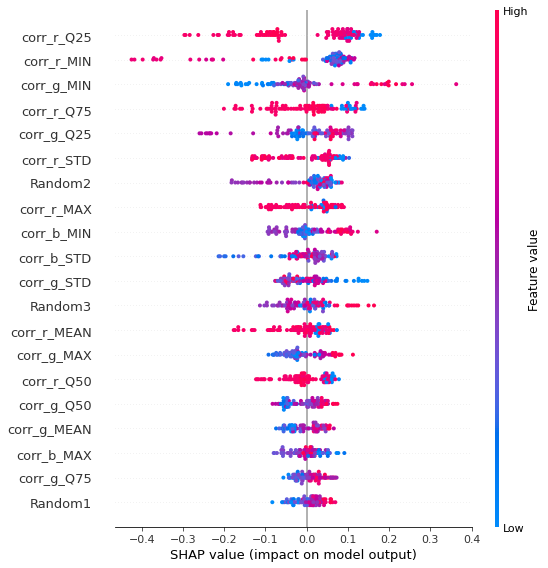

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

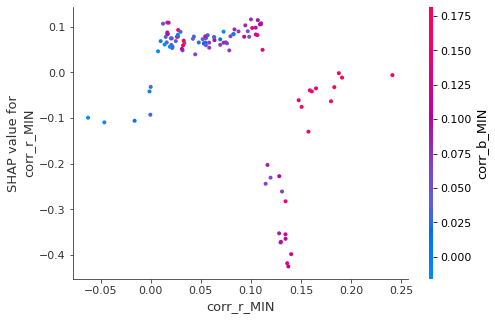

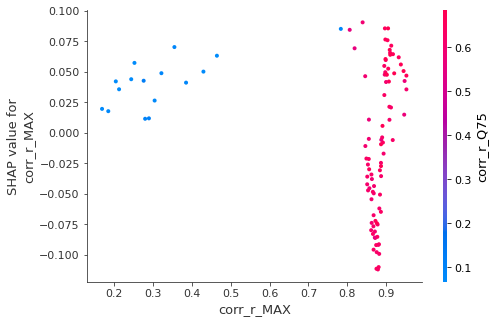

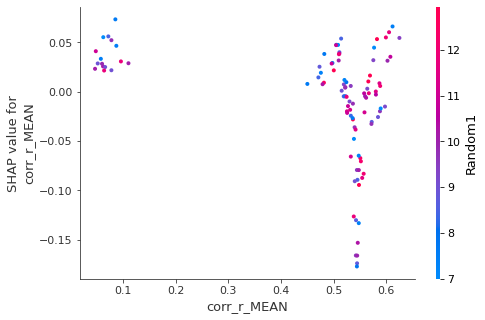

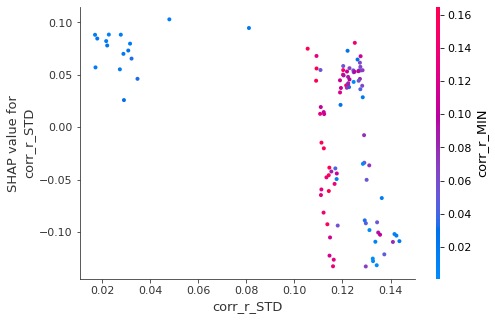

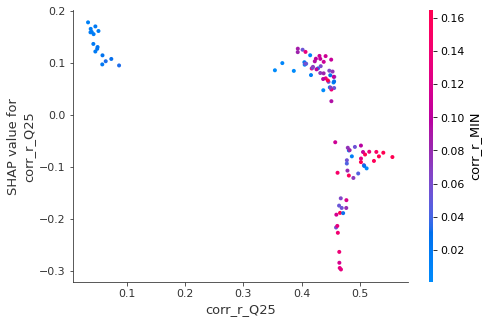

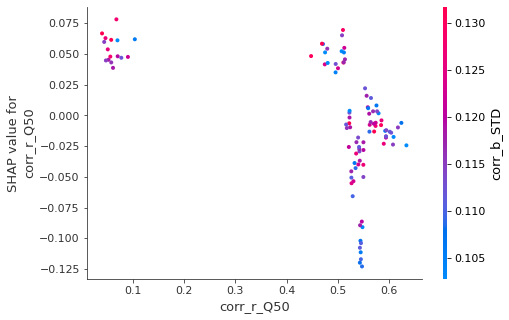

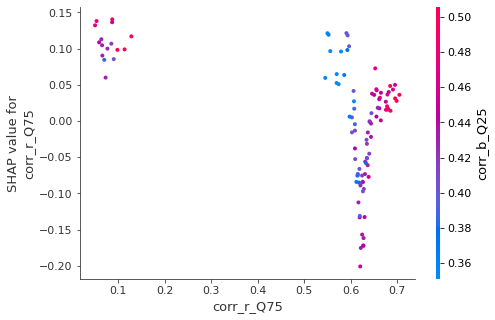

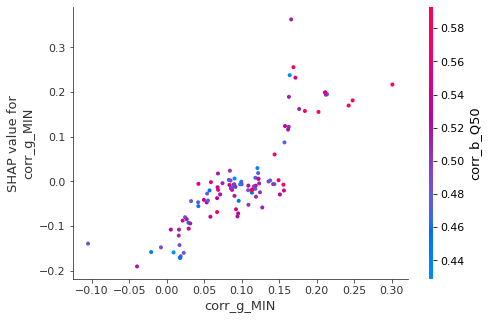

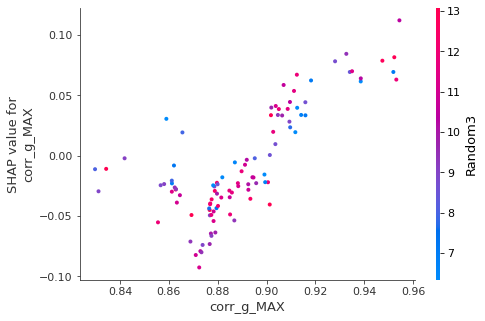

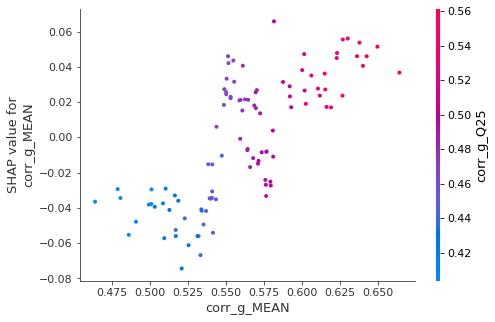

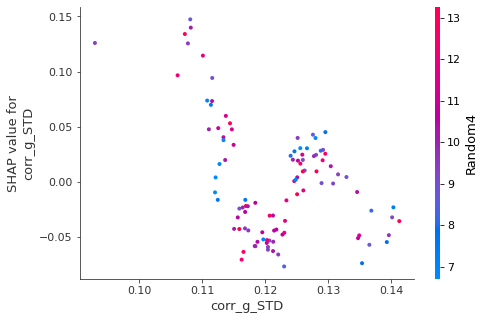

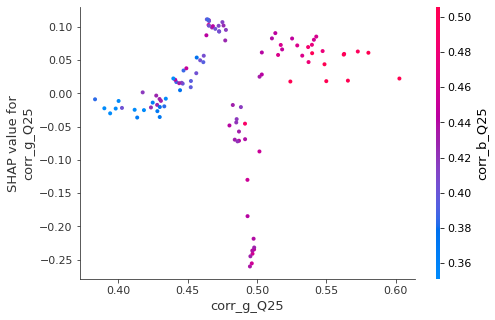

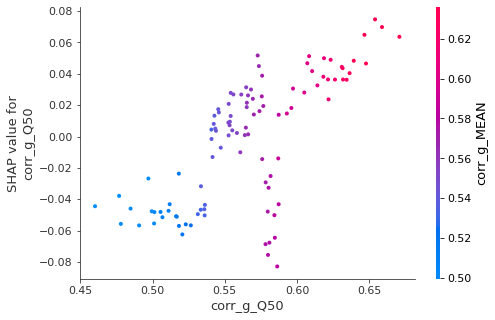

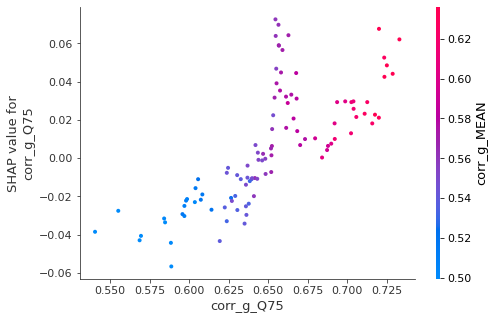

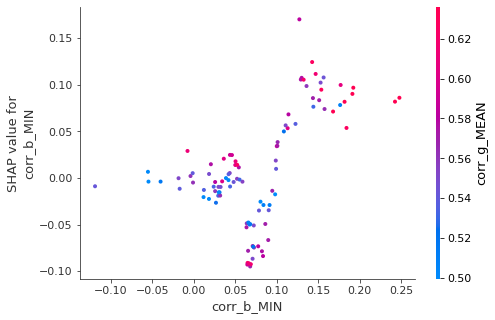

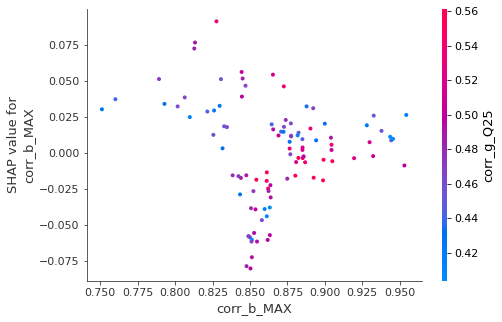

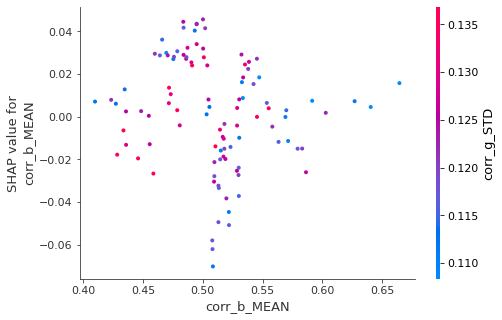

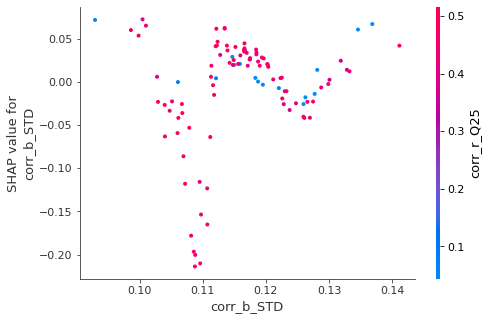

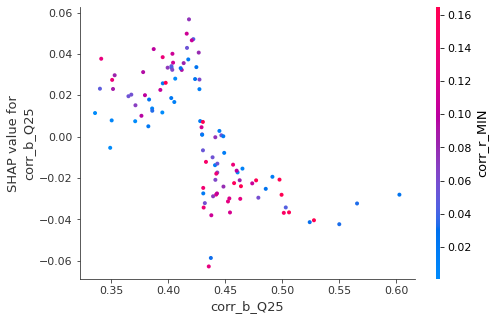

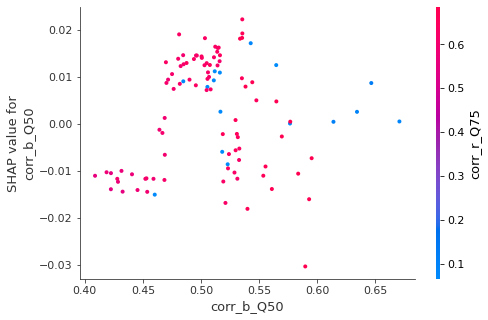

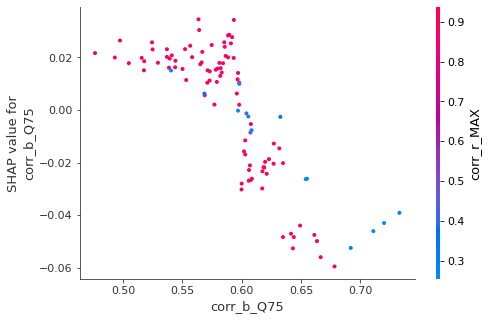

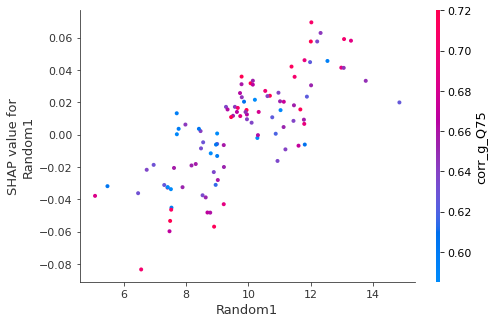

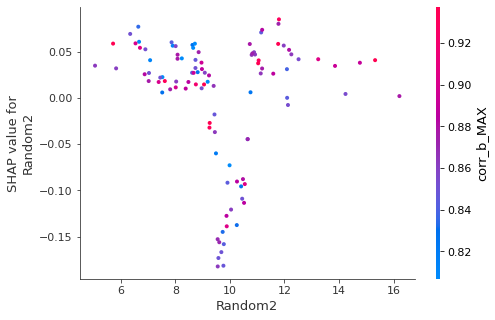

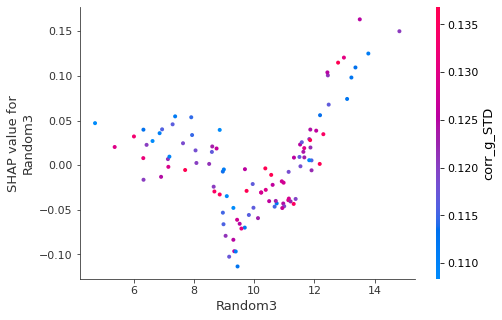

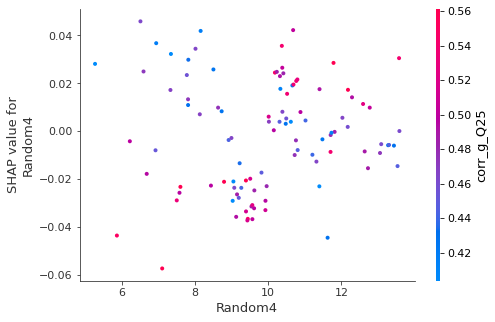

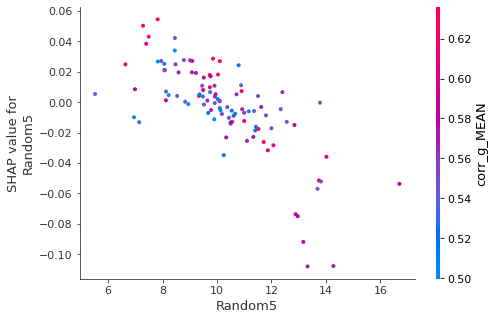

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")